In [40]:
from warnings import filterwarnings
filterwarnings('ignore')

In [41]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


# Veri setinin Okunması ve Düzenlenmesi

In [42]:
df =  pd.read_csv("USArrests.csv").copy()
df.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


- Veri setindeki eyalet isimlerini index olarak belirliyeceğiz ve yukarısındaki başlığı kaldıracağız 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Unnamed: 0    50 non-null object
Murder        50 non-null float64
Assault       50 non-null int64
UrbanPop      50 non-null int64
Rape          50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [44]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [45]:
df.index = df.iloc[:,0]
df = df.iloc[: , 1:]
df.head(3)

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


In [46]:
del df.index.name
df.head(3)
#  index ismini başarı ile kaldırdık 


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


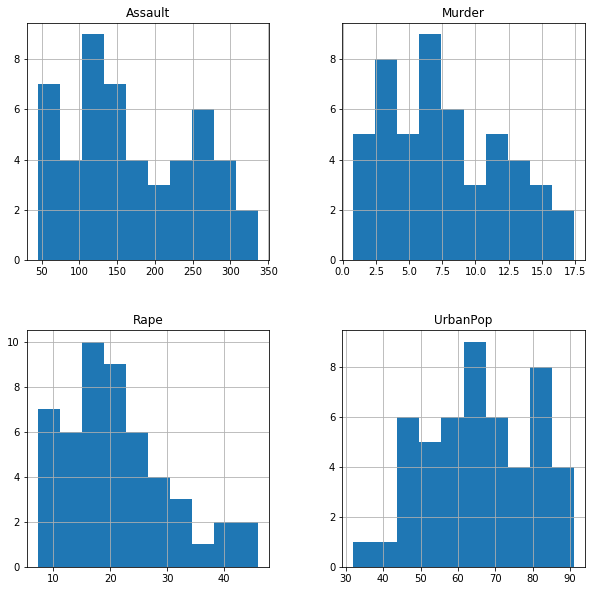

In [47]:
df.hist(figsize = (10 ,10));
# dağılımlar normal dağılımların oluşum sebepleri incelenmelidir

# Model kurma 

In [48]:
#standartlaştırma işlemi 

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
df = StandardScaler().fit_transform(df)

In [51]:
# Model kurma 

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df)

In [53]:
df_2 = pd.DataFrame(data = pca_fit , columns = ["bir" ,"iki"])

In [54]:
df_2[:3]

,bir,iki
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957


In [58]:
pca.explained_variance_ratio_ #acıklanan varyans oranı
#gerçek verinin taşıdığı bilginin ne kadarını taşıdığını gösterir

array([0.62006039, 0.24744129])

In [59]:
np.cumsum( pca.explained_variance_ratio_ )

array([0.62006039, 0.86750168])

In [60]:
# görsel

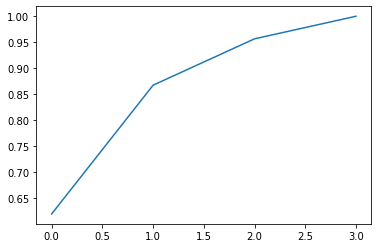

In [65]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_));